<a href="https://colab.research.google.com/github/nmbayu/Files/blob/main/nmbayu_pj4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [ ]:
import urllib.request

In [ ]:
url=('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv')

In [ ]:
urllib.request.urlretrieve(url, './fcc-forum-pageviews.csv')

('./fcc-forum-pageviews.csv', <http.client.HTTPMessage at 0x7eb9c7cf21a0>)

In [ ]:
df=pd.read_csv("fcc-forum-pageviews.csv", index_col="date")

In [ ]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [ ]:
df=df.drop(df[(df['value']<df['value'].quantile(0.025)) | (df['value']>df['value'].quantile(0.975))].index)

In [ ]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

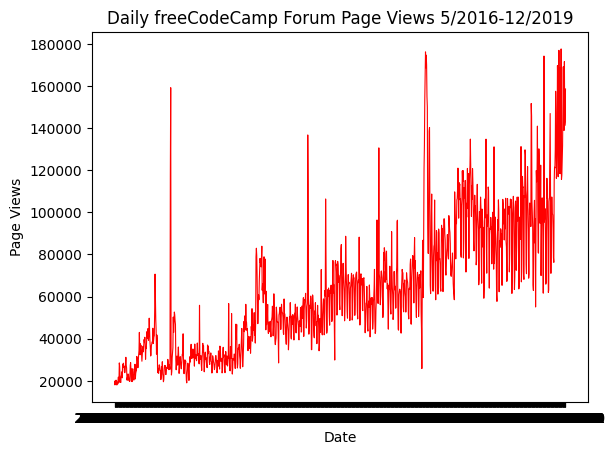

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['value'],color='red',linewidth=0.8)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

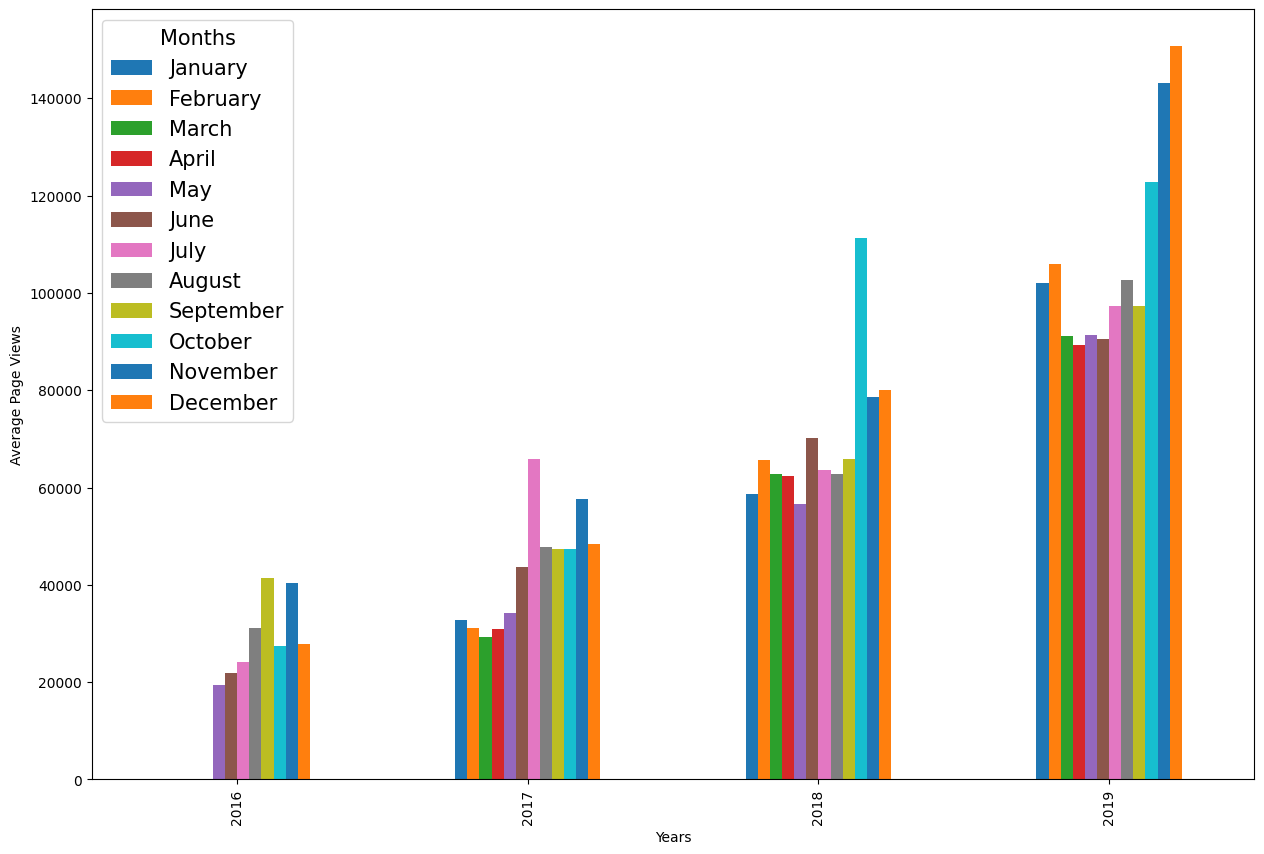

In [ ]:
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July',
             'August', 'September', 'October', 'November', 'December']
# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title= 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

Text(0, 0.5, 'Page Views')

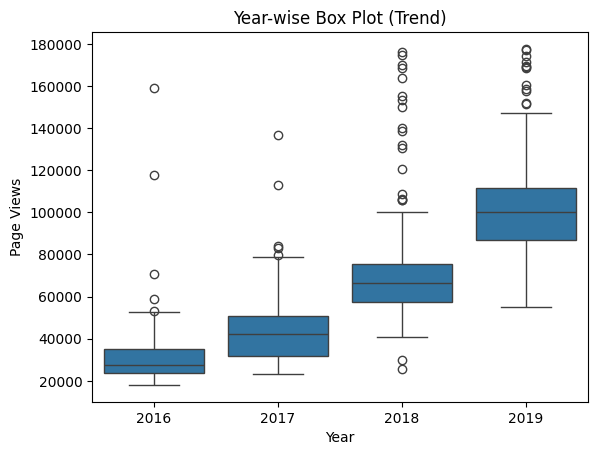

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
plt1 =sns.boxplot(x = "Year", y = "value", data = df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

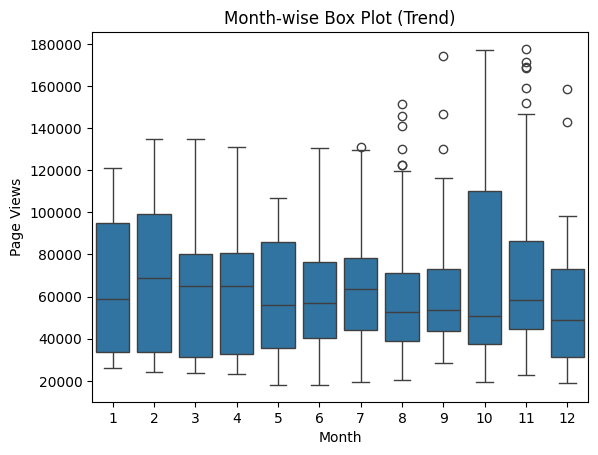

In [ ]:
plt2=sns.boxplot(x='Month',y='value',data=df_box)
plt2.set_title("Month-wise Box Plot (Trend)")
plt2.set_xlabel('Month')
plt2.set_ylabel('Page Views')